<a href="https://colab.research.google.com/github/jacobdwatters/Machine-Learning-Basics/blob/main/logistic_regression/01_logistic_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Logistic Regression With NumPy

---


#### Imports and Setup

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---

## 1. Define the Logistic Regression Class

---

In [88]:
class LogisticRegression:
  
  def __init__(self, lr=0.05, iterations=1000):
    self.lr = lr
    self.iterations = iterations 

  def sigmoid(self, X):
    """sigmoid/logistic function"""
    return 1 / (1+np.exp(-X@self.w))
  
  def bce_grad(self, X, y):
    """binary cross-entropy gradient"""
    return X.T@(self.sigmoid(X)-y)

  def grad_descent(self, V, y):
    """Gradient Descent"""
    # initialize weights to random value
    self.w = np.random.normal(0, 0.2, size=(len(V[0]), 1))

    for i in range(self.iterations):
      self.w = self.w - self.lr*self.bce_grad(V, y)

  def fit(self, X, y):
    V = np.column_stack((np.ones(len(X)), X))
    self.grad_descent(V, y)

  def predict(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    return np.round(self.sigmoid(V))

  def predict_proba(self, X):
    V = np.column_stack((np.ones(len(X)), X))
    predictions = self.sigmoid(V)
    return np.column_stack((predictions, 1-predictions))

  def __str__(self):
    model_str = 'y = 1 / [1 + e^{-('

    for i, w_i in enumerate(self.w.flatten()):
      model_str += str(w_i)

      if i>0:
        model_str += "x_" + str(i)
      if i!=len(self.w)-1:
        model_str += ' + '

    return model_str + ')}]'

---

## 2. One Dimensional Logistic Regression

---

First, we will take a look at fitting a logistic regression model to a dataset with a single feature and a single target.

#### Generate Dataset

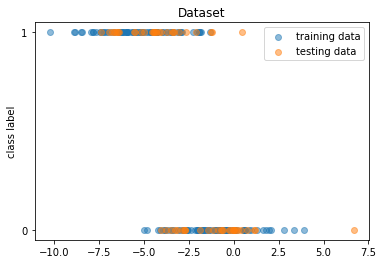

In [89]:
train_size = 150
test_size = 60

np.random.seed(42)

# Training dataset
X_train1 = np.append(
      np.random.normal(-5, 2, train_size//2), 
      np.random.normal(-1, 2, train_size//2)
    ).reshape(-1, 1)
y_train1 = np.append(
      [1]*(train_size//2), 
      [0]*(train_size//2)
    ).reshape(-1, 1)

# Testing dataset
X_test1 = np.append(
      np.random.normal(-5, 2, test_size//2), 
      np.random.normal(-1, 2, test_size//2)
    ).reshape(-1, 1)
y_test1 = np.append(
      [1]*(test_size//2), 
      [0]*(test_size//2)
    ).reshape(-1, 1)

plt.scatter(X_train1, y_train1, c='tab:blue', label='training data', alpha=0.5)
plt.scatter(X_test1, y_test1, c='tab:orange', label='testing data', alpha=0.5)
plt.title("Dataset")
plt.yticks([0, 1])
plt.ylabel('class label')
plt.legend()
plt.show()

#### Fit a Logistic Regression Model to the Training Data

In [90]:
logreg = LogisticRegression(0.01)
logreg.fit(X_train1, y_train1)

print('Regression Model:\n', logreg, "\n")
print('Model Parameters:\n', logreg.w.flatten())

Regression Model:
 y = 1 / [1 + e^{-(-3.807275240299877 + -1.2148588040793835x_1)}] 

Model Parameters:
 [-3.80727524 -1.2148588 ]


#### Use Fit Model to Make Predictions on the Testing Data.

In [91]:
np.random.seed(100)
y_pred1 = logreg.predict(X_test1)
y_pred_proba1 = logreg.predict_proba(X_test1)

print('First 10 predictions:\n' + '-'*21)
print('Class Predictions:', y_pred1.flatten()[0:10])
print('Class Probabilities:\n', np.round(y_pred_proba1, 3)[0:10])

First 10 predictions:
---------------------
Class Predictions: [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
Class Probabilities:
 [[0.84  0.16 ]
 [0.806 0.194]
 [0.981 0.019]
 [0.846 0.154]
 [0.826 0.174]
 [0.982 0.018]
 [0.094 0.906]
 [0.753 0.247]
 [0.994 0.006]
 [0.662 0.338]]


#### Model Visualization

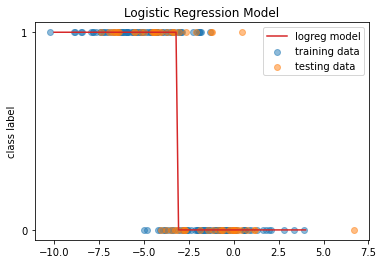

In [92]:
D = np.linspace(-10, 4, 100)
R = logreg.predict(D)

plt.scatter(X_train1, y_train1, c='tab:blue', label='training data', alpha=0.5)
plt.scatter(X_test1, y_test1, c='tab:orange', label='testing data', alpha=0.5)
plt.plot(D, R, c='tab:red', label='logreg model')
plt.title("Logistic Regression Model")
plt.yticks([0, 1])
plt.ylabel('class label')
plt.legend()
plt.show()

#### Metrics
Now that we have fit a logistic regression model to the training data and used it to make predictions on the testing data, let's evaluate how good the model is at predicting the class of data sample.

##### Accuracy, Precision, Recall, and F1 Score

In [93]:
def accuracy(y, y_pred):
  return np.sum(y==y_pred)/len(y)

def precision(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fp = np.sum(np.logical_and(y!=y_pred, y_pred==1))
  return tp/(tp+fp)

def recall(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fn = np.sum(np.logical_and(y!=y_pred, y_pred==0))
  return tp/(tp+fn)

def f1(y, y_pred):
  pre = precision(y, y_pred)
  rec = recall(y, y_pred)
  return 2*pre*rec / (pre + rec)

In [94]:
y1 = np.array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]).reshape(-1, 1)
y2 = np.array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]).reshape(-1, 1)

print('Classification Metrics (testing data):\n' + '-'*38)
print('accuracy = %.3f' % accuracy(y_test1, y_pred1))
print('precsion = %.3f' % precision(y_test1, y_pred1))
print('recall = %.3f' % recall(y_test1, y_pred1))
print('f1 score = %.3f' % f1(y_test1, y_pred1))

Classification Metrics (testing data):
--------------------------------------
accuracy = 0.817
precsion = 0.828
recall = 0.800
f1 score = 0.814


##### Confusion Matrix

If may be useful to look at all true positives, false positives, true negatives, and false negatives from the models predictions. We can put these four values in a matrix called a confustion matrix and plot it.

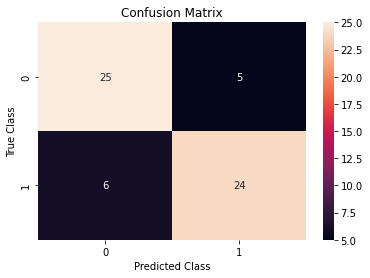

In [95]:
def conf_mat(y, y_pred):
  tp = np.sum(np.logical_and(y==y_pred, y_pred==1))
  fp = np.sum(np.logical_and(y!=y_pred, y_pred==1))
  tn = np.sum(np.logical_and(y==y_pred, y_pred==0))
  fn = np.sum(np.logical_and(y!=y_pred, y_pred==0))
  
  return np.array([[tn, fp], [fn, tp]])


cf = conf_mat(y_test1, y_pred1)

sns.heatmap(cf, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

##### Receiver Operating Characteristic (ROC) Curve

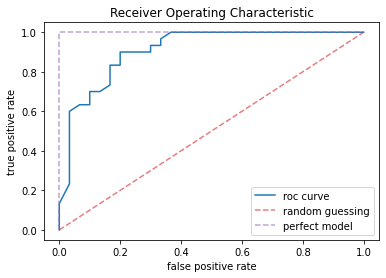

In [96]:
def get_roc(y_test, y_pred_proba):
  tp_rates = []
  fp_rates = []
  probabilities = y_pred_proba[:, 1].flatten()

  for p in np.linspace(0, 1, 100):
    y_test_preds = probabilities > p
    y_test_preds = y_test_preds.reshape(-1, 1)

    fp = np.sum(np.logical_and(y_test1!=y_test_preds, y_test_preds==1))
    tn = np.sum(np.logical_and(y_test1==y_test_preds, y_test_preds==0))

    tpr = recall(y_test1, y_test_preds)
    fpr = fp / (fp + tn)

    tp_rates.append(tpr)
    fp_rates.append(fpr)

  return tp_rates, fp_rates

tp_rates, fp_rates = get_roc(y_test1, y_pred_proba1)

plt.plot(tp_rates, fp_rates, label='roc curve')
plt.plot([0, 1], [0, 1], label='random guessing', c='tab:red', linestyle='dashed', alpha=0.6)
plt.plot([0, 0, 1], [0, 1, 1], label='perfect model', c='tab:purple', linestyle='dashed', alpha=0.6)
plt.title('Receiver Operating Characteristic')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

---

## 3. Multi-Dimensional Logistic Regression

---

Now let's take a look at fitting a logistic regression model to a dataset with multiple features and a single target.

#### Generate Dataset